In [195]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [196]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Read_data

In [198]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [199]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [203]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    return ms

In [204]:
missingdata(train_df)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [205]:
missingdata(test_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


### Cabin has a high number of missing values in both dataframe, so it's dropped

In [206]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

### Filling Embarked and Fare values

In [207]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [208]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

### Check for missing data again

In [209]:
missingdata(train_df)

,Total,Percent
Age,177,19.86532


In [210]:
missingdata(test_df)

,Total,Percent
Age,86,20.574163


In [211]:
train_df['Age'].mean(), test_df['Age'].mean()

(29.69911764705882, 30.272590361445783)

In [212]:
train_df['Age'].median(), test_df['Age'].median()

(28.0, 27.0)

<AxesSubplot: >

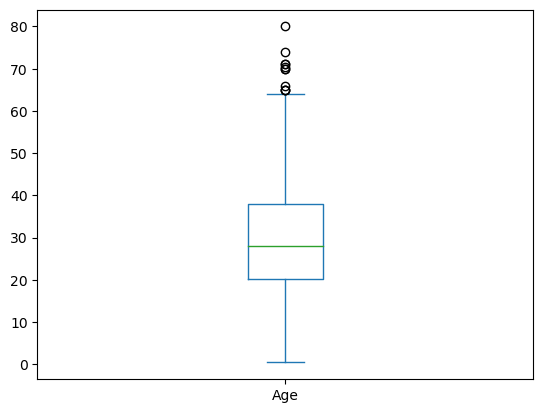

In [213]:
train_df.Age.plot(kind = 'box')

<AxesSubplot: >

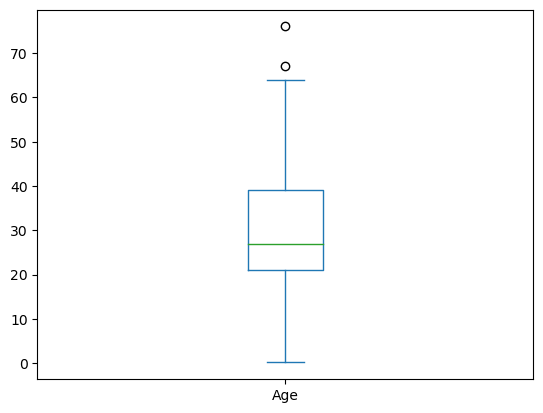

In [214]:
test_df.Age.plot(kind = 'box')

### Age distribution plot is skewed, we will use median values to replace all missing values

In [215]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [216]:
train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

## Wrangle Data

In [217]:
combine = [train_df, test_df]

In [218]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [219]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [220]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [221]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [222]:
## create bin for age features
for dataset in combine:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=4, labels=['Children','Teenage','Adult','Elder'])

In [223]:
## create bin for fare features
for dataset in combine:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=4, labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [225]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [226]:
train_df.drop(columns=['Age','Fare','Name','Ticket','PassengerId','SibSp','Parch'],inplace=True)

In [227]:
test_df.drop(columns=['Age','Fare','Name','Ticket','PassengerId','SibSp','Parch'],inplace=True)

In [232]:
train_df.head()

,Survived,Pclass,Sex,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,0,3,male,S,Mr,2,Teenage,Low_fare
1,1,1,female,C,Mrs,2,Teenage,Low_fare
2,1,3,female,S,Miss,1,Teenage,Low_fare
3,1,1,female,S,Mrs,2,Teenage,Low_fare
4,0,3,male,S,Mr,1,Teenage,Low_fare


In [233]:
test_df.head()

,Pclass,Sex,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,3,male,Q,Mr,1,Teenage,Low_fare
1,3,female,S,Mrs,2,Adult,Low_fare
2,2,male,Q,Mr,1,Elder,Low_fare
3,3,male,S,Mr,1,Teenage,Low_fare
4,3,female,S,Mrs,3,Teenage,Low_fare


In [234]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [235]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [236]:
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [237]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

In [238]:
age_mapping = {"Children": 1, "Teenage": 2, "Adult": 3, "Elder": 4}
train_df['Age_bin'] = train_df['Age_bin'].map(age_mapping)
test_df['Age_bin'] = test_df['Age_bin'].map(age_mapping)

In [239]:
fare_mapping = {"Low_fare": 1, "median_fare": 2, "Average_fare": 3, "high_fare": 4}
train_df['Fare_bin'] = train_df['Fare_bin'].map(fare_mapping)
test_df['Fare_bin'] = test_df['Fare_bin'].map(fare_mapping)

In [40]:
#train_df = pd.get_dummies(train_df, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"])

In [41]:
#test_df = pd.get_dummies(test_df, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"])

## Correlation Plot

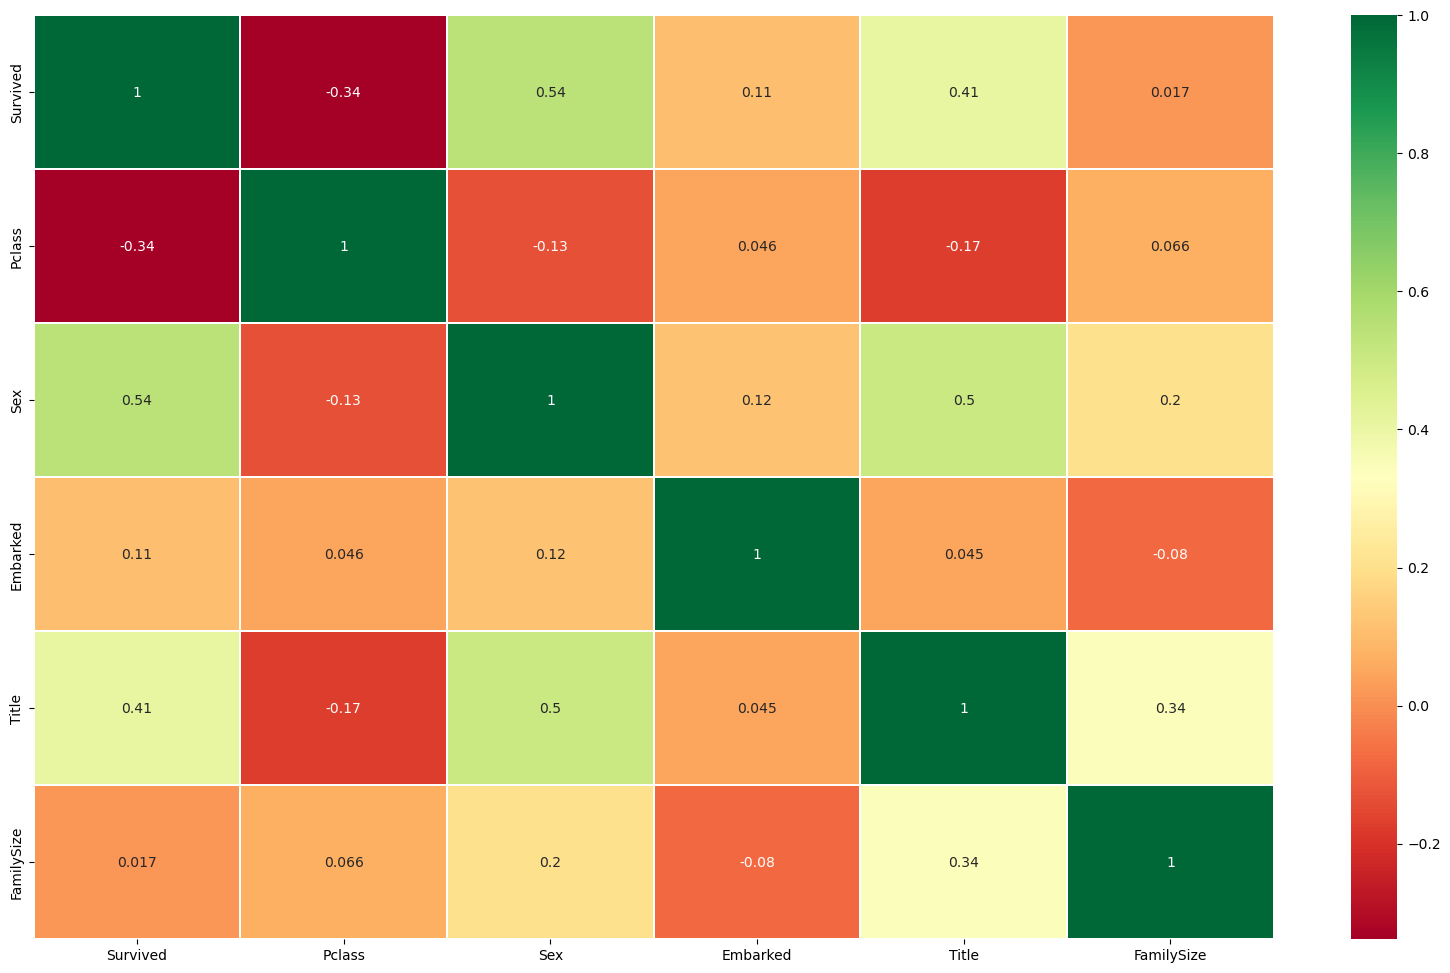

In [242]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)

## Application of ML algorithms

In [243]:
X_train = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
X_test = test_df.copy()

## Logistic Regression

In [244]:
model = LogisticRegression()
model.fit(X_train,y)
prediction_lr=model.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score, classification_report

In [246]:
print('The accuracy of the Logistic Regression is: ', round(model.score(X_train, y) * 100,2))

The accuracy of the Logistic Regression is:  82.04


## Decision Tree

In [277]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
model= DecisionTreeClassifier(criterion='entropy', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',
                             max_depth = 7)
model.fit(X_train,y)
prediction_tree=model.predict(X_test)

In [279]:
print('The accuracy of the DecisionTree Classifier is: ',round(model.score(X_train, y) * 100,2))

The accuracy of the DecisionTree Classifier is:  84.06


In [280]:
from sklearn import tree

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

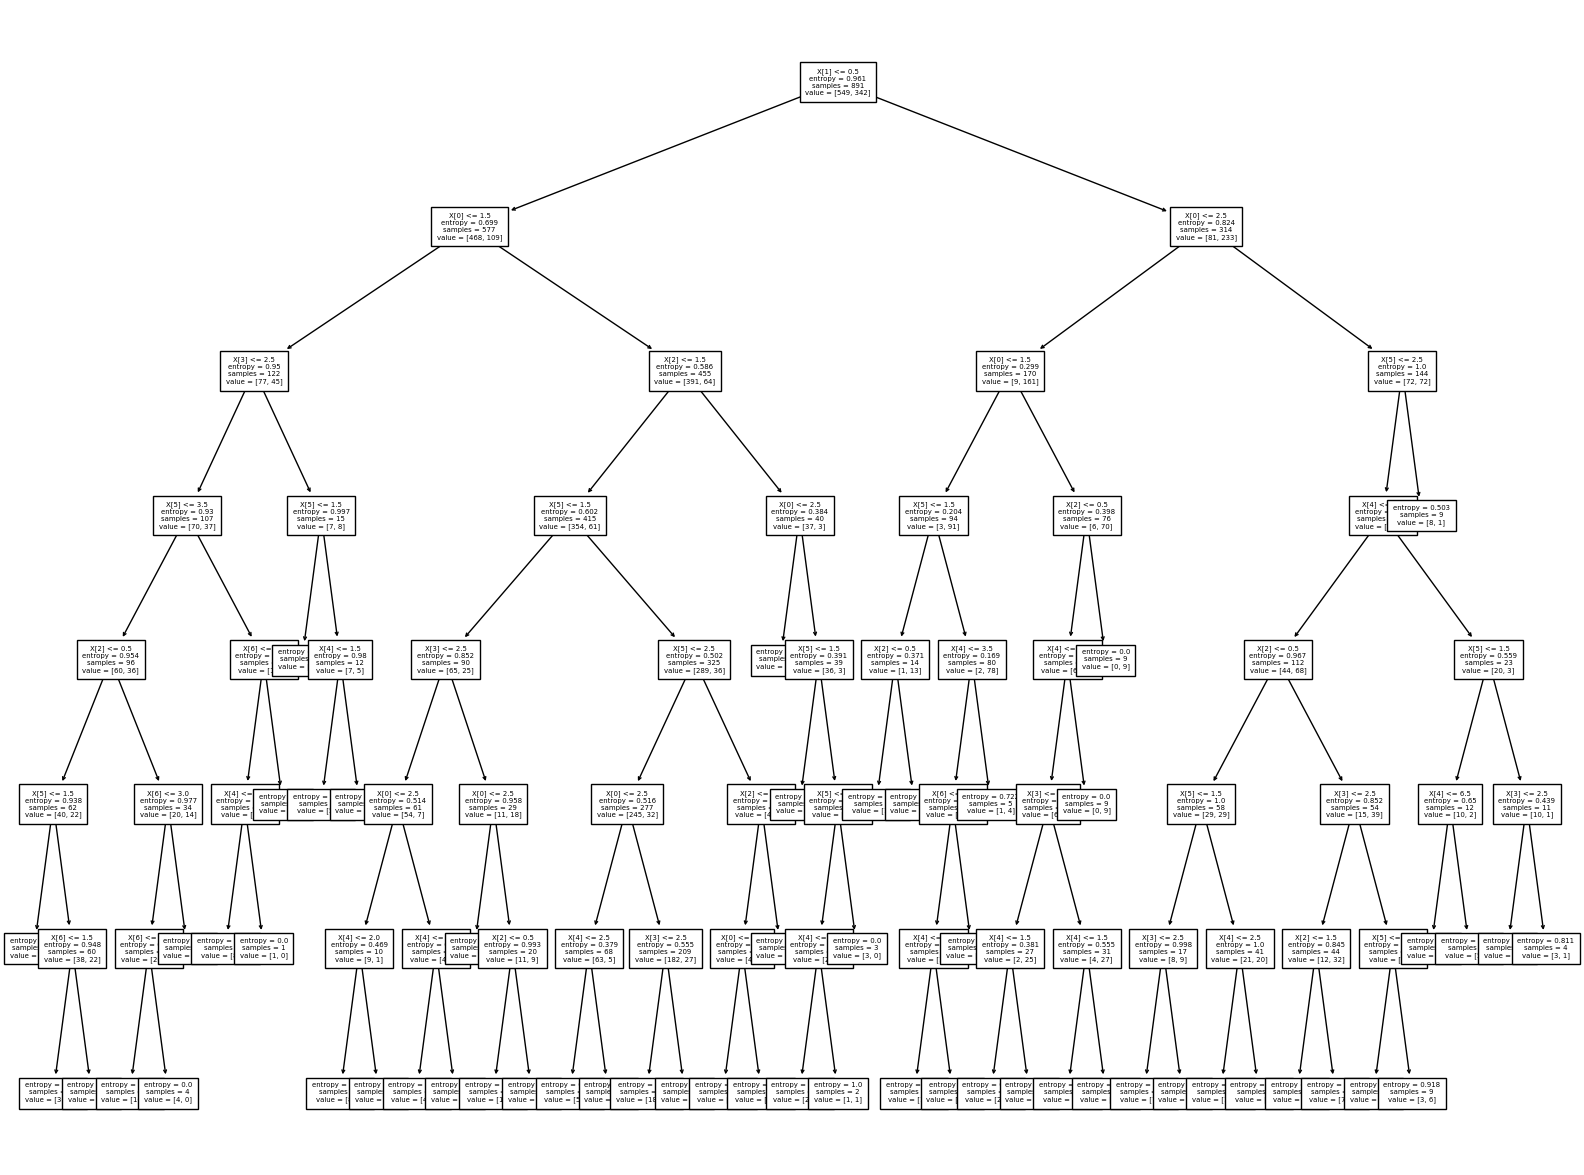

In [252]:
fn=['Pclass','Sex','Embarked','Title','FamilySize','Age_bin','Fare_bin']
cn=['0', '1']

plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
tree.plot_tree(model, fontsize=5)
plt.savefig('DT.png', dpi=600)
plt.show()
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#tree.plot_tree(model,
#               feature_names = fn, 
#               class_names=cn,
#               filled = True);
#fig.savefig('DT.png')

## Hyperparameter tuning for DT

In [282]:
dt = DecisionTreeClassifier(random_state=420)

In [283]:
params = {
    'max_depth': [2, 3, 5, 8, 10, 15],
    'max_leaf_nodes': [10,20,30,40, 50],
    #'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [3, 5, 7, 10],
    'criterion': ["gini", "entropy"]

}

In [284]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [285]:
grid_search.fit(X_train, y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=420),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 15],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_split': [3, 5, 7, 10]},
             scoring='accuracy', verbose=1)

In [286]:
grid_dt = grid_search.best_estimator_

In [287]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'min_samples_split': 3}

[Text(0.5, 0.875, 'X[3] <= 1.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = 0'),
 Text(0.25, 0.625, 'X[0] <= 1.5\nentropy = 0.626\nsamples = 517\nvalue = [436, 81]\nclass = 0'),
 Text(0.125, 0.375, 'X[6] <= 3.5\nentropy = 0.93\nsamples = 107\nvalue = [70, 37]\nclass = 0'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 105\nvalue = [70, 35]\nclass = 0'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.375, 0.375, 'X[4] <= 3.5\nentropy = 0.492\nsamples = 410\nvalue = [366, 44]\nclass = 0'),
 Text(0.3125, 0.125, 'entropy = 0.503\nsamples = 396\nvalue = [352, 44]\nclass = 0'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = 0'),
 Text(0.75, 0.625, 'X[0] <= 2.5\nentropy = 0.884\nsamples = 374\nvalue = [113, 261]\nclass = 1'),
 Text(0.625, 0.375, 'X[3] <= 4.5\nentropy = 0.526\nsamples = 202\nvalue = [24, 178]\nclass = 1'),
 Text(0.5625, 0.125, 'entropy = 0.288\nsamples = 179\nvalue = [9, 170]\nclass = 1'),


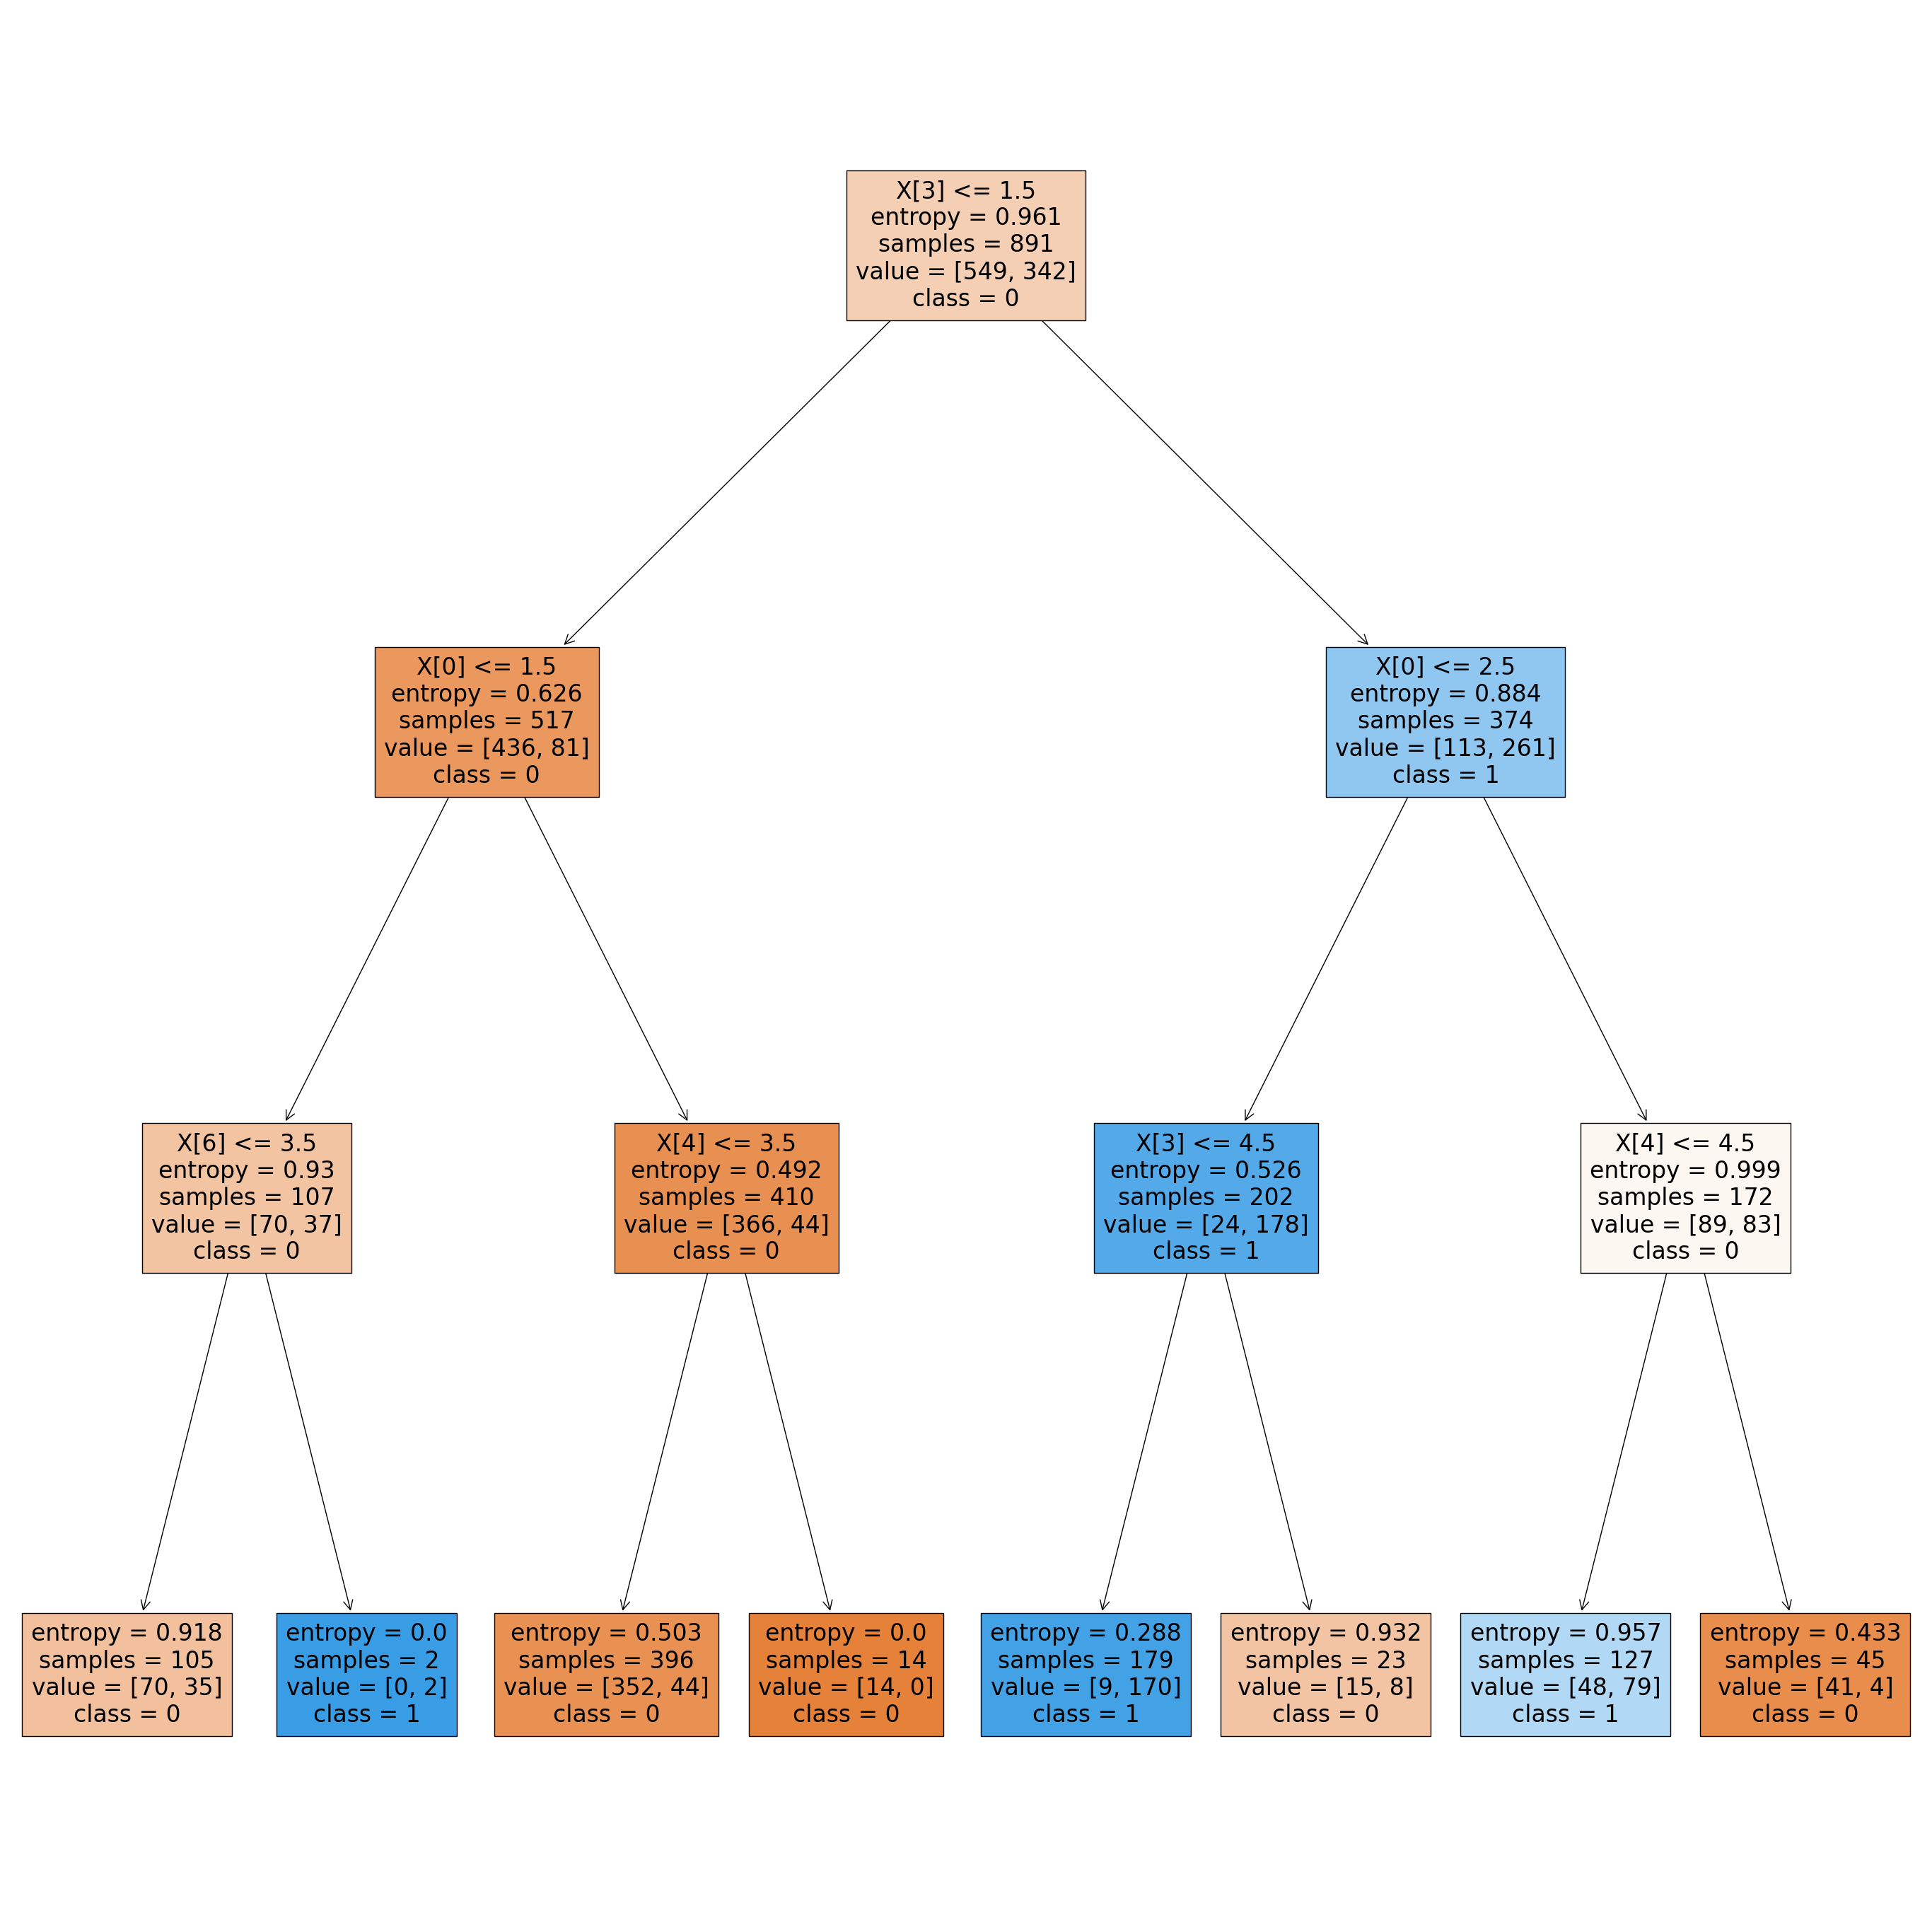

In [288]:
fig = plt.figure(figsize=(35,35))
tree.plot_tree(grid_dt, filled=True, class_names=['0','1'])
#plt.savefig('DT_fine-tuned.png', dpi=600)

In [305]:
from sklearn.metrics import accuracy_score, classification_report
pred = grid_dt.predict(X_train)
accuracy_score(y, pred)

0.8338945005611672

In [311]:
kfold = KFold(n_splits=5, random_state=420,shuffle = True) # k=5, split the data into 5 equal parts

In [312]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=420,max_leaf_nodes = 10)

In [313]:
result_rm=cross_val_score(clf,X_train,y,cv=kfold,scoring='accuracy')

In [314]:
print('The cross validated score for Decision Tree Classifier is:',round(result_rm.mean()*100,2))

The cross validated score for Decision Tree Classifier is: 82.71


## Random Forest

In [347]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(model.score(X_train, y)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 85.19


### Hyperparameter tuning for Random Forest

In [348]:
params = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [100, 200, 300, 500,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [349]:
grid_search.fit(X_train, y)
grid_search.best_params_

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 200}

In [350]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=4, max_features=4, min_samples_split=12,
                       n_estimators=200)

In [351]:
model_rf = RandomForestClassifier(bootstrap =True,
                                  max_depth = 5,
                                  max_features = 3,
                                  min_samples_leaf= 1,
                                  min_samples_split= 12,
                                  n_estimators= 100)
model_rf.fit(X_train,y)
prediction_rm=model_rf.predict(X_test)

In [352]:
print('The accuracy of the Random Forest Classifier after tuning is',round(model_rf.score(X_train, y)*100,2))

The accuracy of the Random Forest Classifier after tuning is 84.06


In [353]:
kfold_rf = KFold(n_splits=5, random_state = 211,shuffle=True) 
result_rf=cross_val_score(model,X_train,y,cv=kfold_rf,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rf.mean()*100,2))

The cross validated score for Random Forest Classifier is: 82.94
